In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn
seaborn.set()

In [2]:
basicData_num_x = np.arange(4,18)

In [3]:
basicData_num_y = np.array([0.254, 0.2376, 0.2542, 0.256, 0.4328, 0.3632, 0.3174, 0.3122, 0.761, 2.628,
                           19.530, 84, 424, 1740])

[[-1.17781174e+00  8.92337700e+02 -1.78932392e+04  1.27810281e+05
  -4.31866489e+05  7.49189343e+05 -6.45724898e+05  2.19332175e+05]]
0.9998130118198704
[[30974.97762045]]


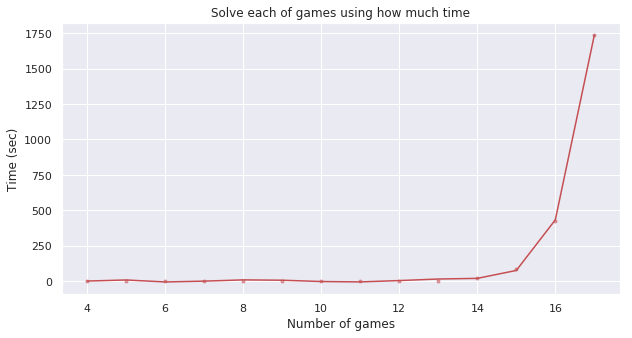

In [10]:
plt.figure(figsize = (10, 5))
plt.plot(basicData_num_x, basicData_num_y, 'r.' , alpha = 0.5)
plt.xlabel('Number of games')
plt.ylabel('Time (sec)')
plt.title('Solve each of games using how much time')

model = make_pipeline(
    SimpleImputer(strategy='mean'), 
    MinMaxScaler(),             
    PolynomialFeatures(degree=7, include_bias=True),
    LinearRegression(fit_intercept=False)
)
reshape_x = basicData_num_x.reshape(-1,1)
reshape_y = basicData_num_y.reshape(-1,1)
model.fit(reshape_x, reshape_y)
plt.plot(reshape_x[:, 0], model.predict(reshape_x), 'r-')
print(model.named_steps['linearregression'].coef_)
print(model.score(reshape_x, reshape_y))
print(model.predict(np.array([20]).reshape(-1,1)))